In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utilities as ut
import construction as cs
%load_ext autoreload
%autoreload 2

import SingleDatasetAnalysis as an

from IPython.core.display import HTML
HTML('<style>.container { width:97% !important; }</style><style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>')

In [5]:
path_data = "data/co-presence/LH10.dat"
path_metadata = "data/co-presence/metadata/metadata_LH10.dat"


groups = cs.split_data_in_groups(path_data,path_metadata)


------------  -----  -----  -----  -------  -------  -----  ------
Name          Admin  Etude  Med    Paramed  Patient  Mixed  TOT
interactions  457    6005   13493  29864    50882    49425  150126
nodes         7      5      10     26       23       73     73
------------  -----  -----  -----  -------  -------  -----  ------


In [155]:
from tabulate import tabulate

def split_data_in_groups(path_data,path_metadata):

    data = cs.load_data(path_data)
    file_metadata = path_metadata

    metadata = dict()
    with open(file_metadata) as f:
        for line in f:
            node,group = line.split()
            metadata[int(node)] = group

    groups = dict()
    person_type = []
    for i in np.unique(list(metadata.values())):
        person_type.append(i)

    person_type.append("Mixed")

    for i in person_type:
        groups[i] = []


    for t,i,j in data:
        if(metadata[i] == metadata[j]):
            groups[metadata[i]].append([t,i,j]) 
        else:
            person = "Mixed"
            groups[person].append([t,i,j])


    interactions_in_group = [len(x) for x in groups.values()]
    node_in_group = [len(np.unique(np.array(x)[:,1:])) for x in groups.values()]
    print(tabulate([["Name"]+list(groups.keys())+["TOT"],
                    ["interactions"]+nodes_in_group+[len(data)],
                    ["nodes"]+node_in_group+[len(cs.individuals(data))]]))


    return(groups)

In [82]:
data = cs.load_data("data/co-presence/Thiers13.dat")
file_metadata = "data/co-presence/metadata/metadata_Thiers13.dat"   

tmp(data,file_metadata)

['2BIO1', '2BIO2', '2BIO3', 'MP', 'MPst1', 'MPst2', 'PC', 'PCst', 'PSIst', 'Mixed']
332
328


In [83]:

data = cs.load_data("data/co-presence/LyonSchool.dat")
file_metadata = "data/co-presence/metadata/metadata_LyonSchool.dat"

tmp(data,file_metadata)

['ce1a', 'ce1b', 'ce2a', 'ce2b', 'cm1a', 'cm1b', 'cm2a', 'cm2b', 'cpa', 'cpb', 'teachers', 'Mixed']
242
242


In [84]:
data = cs.load_data("data/co-presence/InVS15.dat")
file_metadata = "data/co-presence/metadata/metadata_InVS15.dat"

tmp(data,file_metadata)

['DCAR', 'DG', 'DISQ', 'DMCT', 'DMI', 'DSE', 'DST', 'SCOM', 'SDOC', 'SFLE', 'SRH', 'SSI', 'Mixed']
232
218


In [85]:
data = cs.load_data("data/co-presence/InVS13.dat")
file_metadata = "data/co-presence/metadata/metadata_InVS13.dat"
    
tmp(data,file_metadata)

['DISQ', 'DMCT', 'DSE', 'SFLE', 'SRH', 'Mixed']
100
95


In [144]:
path_data = "data/co-presence/LH10.dat"
path_metadata = "data/co-presence/metadata/metadata_LH10.dat"

    
tmp(data,file_metadata)

['Admin', 'Etude', 'Med', 'Paramed', 'Patient', 'Mixed']
81
73


In [76]:
def tmp(data,file_metadata):
    metadata = dict()
    with open(file_metadata) as f:
        for line in f:
            node,group = line.split()
            metadata[int(node)] = group

    groups = dict()
    person_type = []
    for i in np.unique(list(metadata.values())):
        person_type.append(i)

    person_type.append("Mixed")

    for i in person_type:
        groups[i] = []


    for t,i,j in data:
        if(metadata[i] == metadata[j]):
            groups[metadata[i]].append([t,i,j]) 
        else:
            person = "Mixed"
            groups[person].append([t,i,j])


    print(person_type)
    print(len(metadata.values()))
    G3 = cs.build_weighted_graph(np.array(groups["Mixed"]),19)
    print(len(G3))

['Admin', 'Etude', 'Med', 'Paramed', 'Patient', 'Mixed']

81
73


In [34]:
G1 = cs.build_weighted_graph(np.array(groups["DCAR"]),19)
G2 = cs.build_weighted_graph(np.array(groups["DG"]),19)
G3 = cs.build_weighted_graph(np.array(groups["Mixed"]),19)


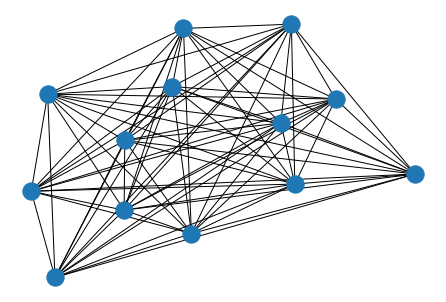

In [35]:
nx.draw(G1)

218

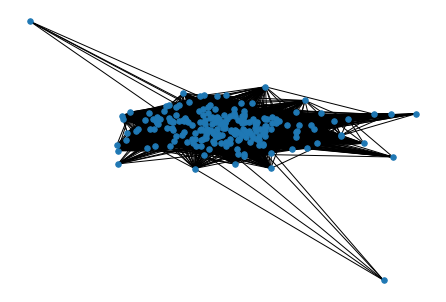

In [36]:
nx.draw(G3,pos=nx.spring_layout(G3),node_size=30)
len(G3)

In [41]:
name_dataset = "Med"
gap = 19
gaps = [19,100,500]
G = G3

0.7971449906845658
0.5809819264060347


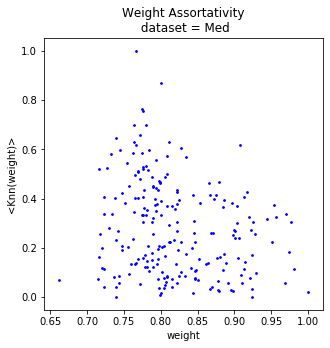

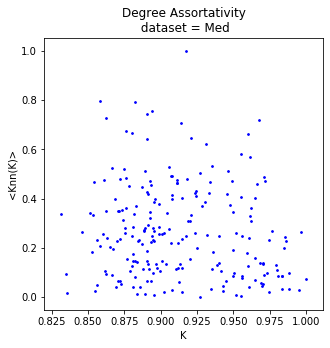

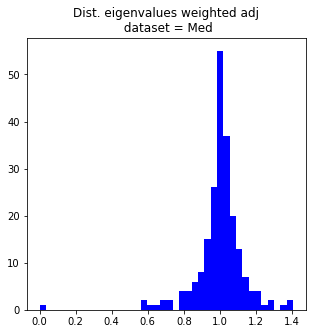

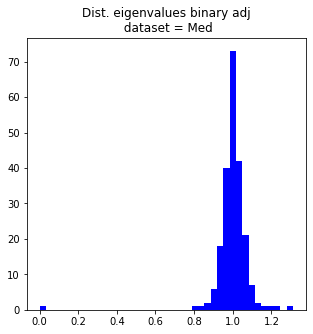

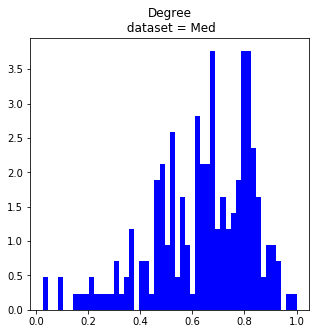

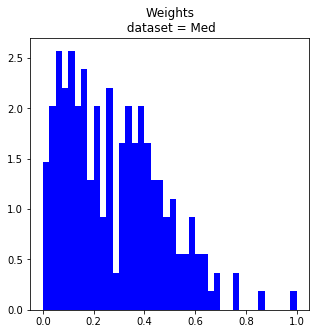

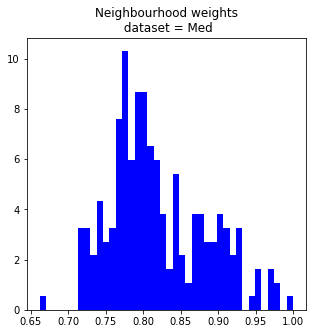

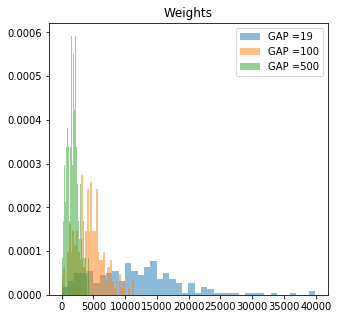

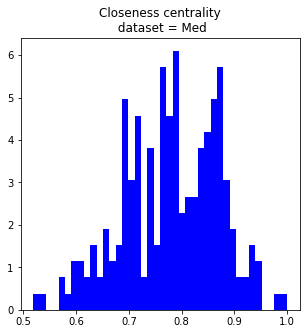

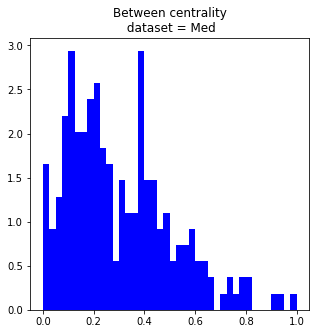

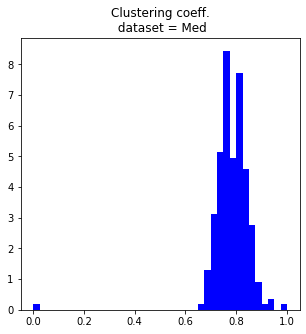

In [42]:
spect_binary = ut.spectral_gap(G,binary_adj_matrix=True)
spect_weighted = ut.spectral_gap(G,binary_adj_matrix=False)
print(spect_binary)
print(spect_weighted)
an.plot_assortativity_weight(G,name_dataset=name_dataset)
an.plot_assortativity_degree(G,name_dataset=name_dataset)
an.plot_dist_eigvals(G,False,name_dataset=name_dataset )
an.plot_dist_eigvals(G,True,name_dataset=name_dataset)
an.plot_dist_degree(G,name_dataset=name_dataset)
an.plot_dist_weights(G,name_dataset=name_dataset)
an.plot_dist_neig_weights(G,name_dataset=name_dataset)
an.plot_dist_weights_gaps(data,gaps)
an.plot_dist_closeness_cent(G,name_dataset=name_dataset)
an.plot_dist_between_cent(G,name_dataset=name_dataset)
an.plot_dist_clust_coeff(G,name_dataset=name_dataset)


In [9]:
G = cs.build_weighted_graph(data,19)


In [16]:
ut.get_neigh_weights(G,True)

{1269: 591.2608695652174,
 1425: 490.45714285714286,
 1426: 675.4193548387096,
 1427: 421.34722222222223,
 1428: 636.3269230769231,
 1430: 642.3076923076923,
 1431: 620.3809523809524,
 1433: 487.7105263157895,
 1434: 428.1967213114754,
 1435: 333.25,
 1436: 966.7916666666666,
 1437: 455.275,
 1438: 584.2432432432432,
 1439: 372.19565217391306,
 1440: 414.2,
 1441: 412.6455696202532,
 1442: 388.0,
 1443: 523.6491228070175,
 1444: 337.06666666666666,
 1446: 517.8,
 1448: 366.9431818181818,
 1449: 628.3571428571429,
 1451: 417.59090909090907,
 1452: 447.7291666666667,
 1453: 504.62264150943395,
 1455: 429.6734693877551,
 1457: 586.9629629629629,
 1458: 442.88188976377955,
 1459: 565.9487179487179,
 1460: 726.4285714285714,
 1461: 562.7241379310345,
 1462: 441.57142857142856,
 1463: 603.5679012345679,
 1464: 571.3333333333334,
 1465: 444.97727272727275,
 1466: 439.9375,
 1467: 477.81159420289856,
 1468: 502.10526315789474,
 1469: 565.566037735849,
 1470: 466.12698412698415,
 1471: 363.0129

In [14]:
print("Graph0")
G = ut.build_weighted_graph(data,19)

plot_assortativity_degree(G)
plot_assortativity_weight(G)

gaps = [19,500]
plot_dist_weights_gaps(data,gaps)
plot_dist_degree(G,normed = False)

Graph0


AttributeError: module 'utilities' has no attribute 'build_weighted_graph'

# da qui

[1.30532584e+00 4.07434822e+04]


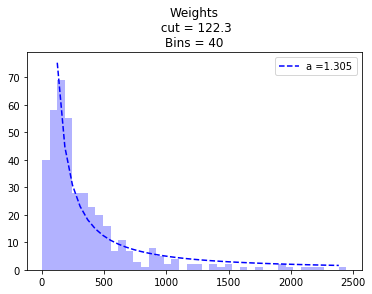

[1.20930466e+00 2.06831096e+04]


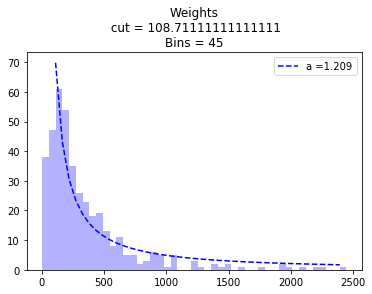

[1.54221931e+00 1.35649761e+05]


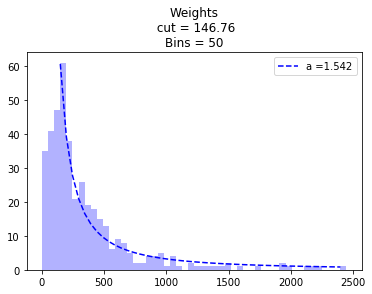

[1.06805798e+00 7.48094939e+03]


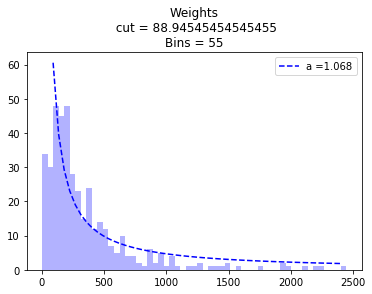

[1.34288429e+00 3.54929676e+04]


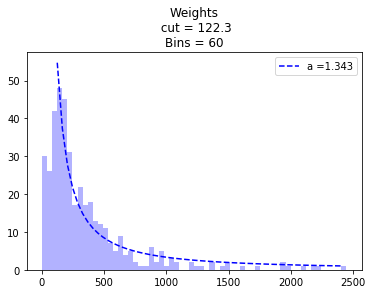

[1.55221251e+00 1.14171120e+05]


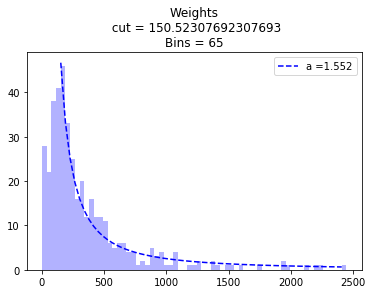

[1.44643143e+00 5.73463676e+04]


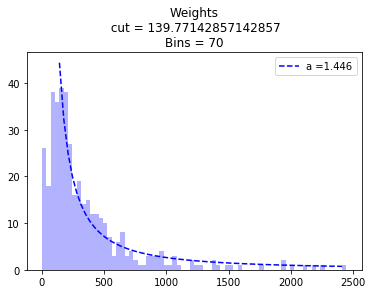

[1.58441284e+00 1.20661790e+05]


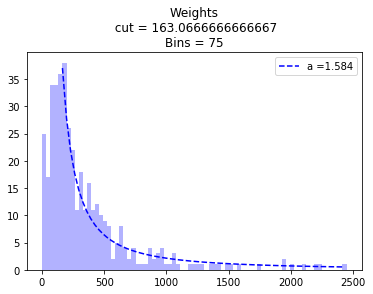

[1.34589494e+00 2.78487292e+04]


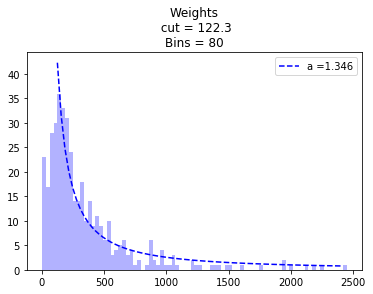

[1.68461272e+00 1.96374623e+05]


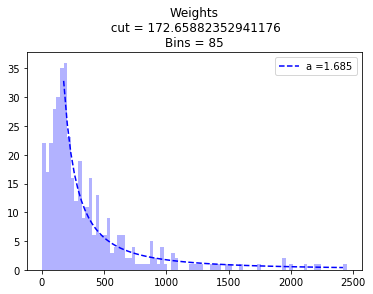

[1.43364986e+00 4.17830199e+04]


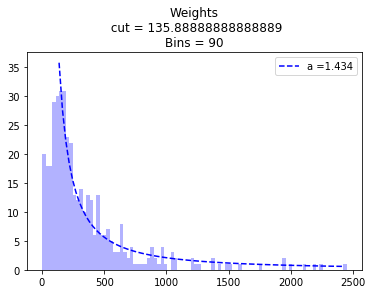

[1.43192921e+00 3.93378601e+04]


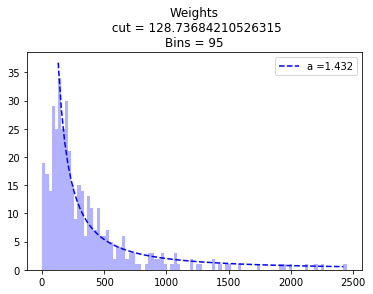

[1.56837920e+00 8.46664084e+04]


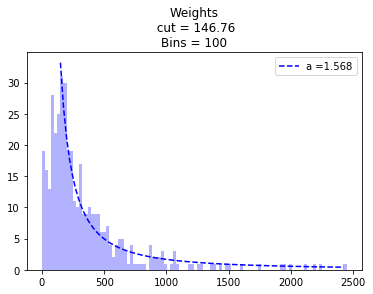

[1.33151198e+00 1.98465038e+04]


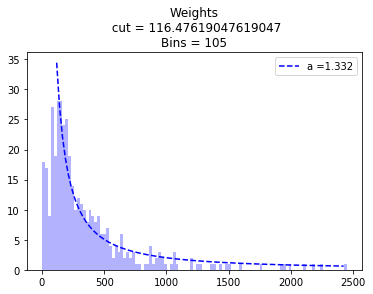

[1.75460269e+00 2.35851966e+05]


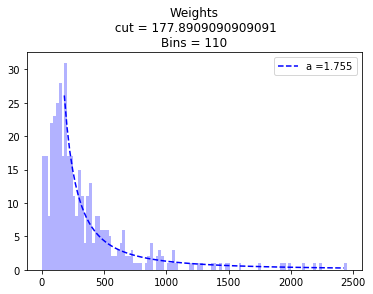

[1.61252366e+00 9.65077668e+04]


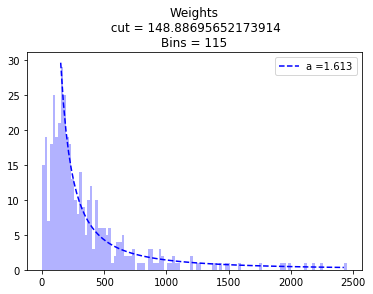

[1.54138068e+00 6.06293366e+04]


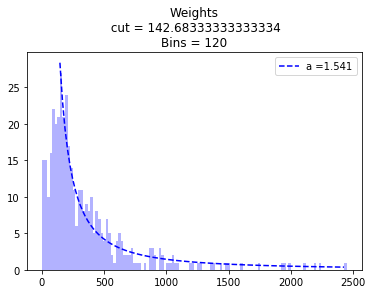

[1.71898342e+00 1.68134168e+05]


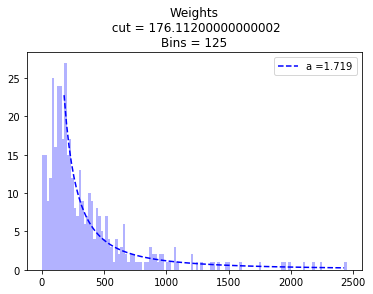

[1.57970292e+00 7.04935721e+04]


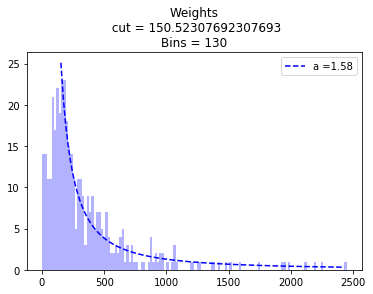

[1.60435045e+00 7.87072691e+04]


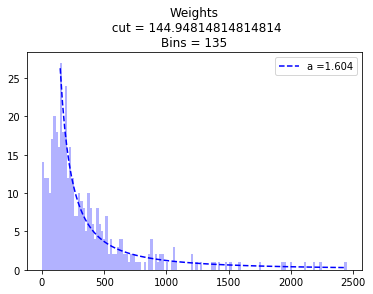

[1.49334732e+00 3.93164911e+04]


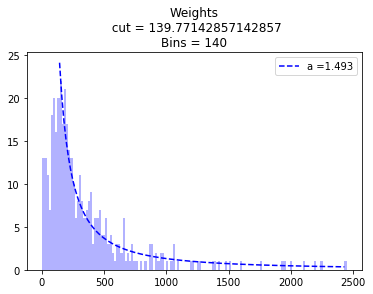

[1.67961492e+00 1.15344740e+05]


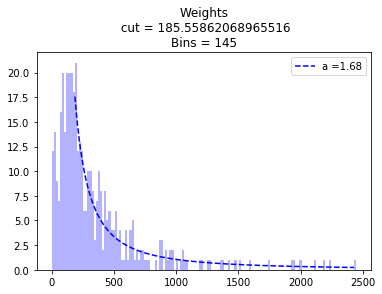

In [20]:
nodes_weights = get_weights(G)
binss = np.arange(40,150,5)
for bins in binss:
    fit_hist_figure(nodes_weights,bins)

1.4598936170212764 79215.54431739396 137


In [ ]:
#draw
plot_weighted_graph(G,pos, node_size=70)
plot_normalized_weights_degree(G)
plot_dist_degree
plot_dist_weights_gaps(data,gaps)
plot_dist_eigvals(G)
plot_graphs(graphs,splitted_data,pos)
fit_hist_figure(X,bins,color="blue")




# construction
load_data(path)
individuals(data)

build_weighted_graph_2(data,gap=19)
build_weighted_graph(data,gap=19)
build_graphs(data,gap=19)

not_consecutive_duplicates_data(data)
split_input_data(data, gap=19)





# utilities
w = get_weights(G,dictionary=True)
get_neigh_weights(G,w)
clustering_coeff(G)
betweenness_centrality(G)
closeness_centrality(G)
degree_centrality(G)
get_spectral_gap(G)


a,c, cut = find_a_c_cut(nodes_weights,
                       min_bin = int(len(nodes_weights)/10),
                       max_bin = int(len(nodes_weights)/3),
                       interval=1)

fit_hist(X,bins)



In [3]:
def cut_data(data,cut):
    new_data = []
    for i in data:
        if (i > cut):
            new_data.append(i)
            
    return(np.array(new_data)-cut)





In [4]:
def fit_hist_figure(X,bins,color="blue"):
    #plt.plot(x_data, y_data,markersize=6)
    
    y_data,x_data = np.histogram(X,bins=bins)
    x_data = x_data[0:-1]
    cut = (np.argmax(y_data))*(np.max(nodes_weights)/bins)

    plt.hist(X,bins=bins,color="blue",alpha=0.3)
    # fit:
    x_data_cut = []
    y_data_cut = []
    for i in range(len(x_data)):
        if x_data[i] > cut:
            x_data_cut.append(x_data[i])
            y_data_cut.append(y_data[i])



    from scipy.optimize import curve_fit

    def poly(x, a, c):
        return c*x**(-a)
    result = curve_fit(poly, x_data_cut, y_data_cut, method='dogbox')
        
    print(result[0])


    y_fit = []
    for x in x_data_cut:
        y_fit.append(poly(x, result[0][0], result[0][1]))


    #plt.plot(x_data,y_data,'o')
    lab = "a ="+str(float("{0:.3f}".format(result[0][0])))
    plt.plot(x_data_cut,y_fit,'--',color=color,label=lab)
    title = "Weights\n cut = "+str(cut)+"\nBins = "+str(bins)
    plt.title(title)
    plt.legend()
    plt.show()


    return result[0]

In [90]:
def plot_signal(x, **kwargs):
    # Skipping a lot of other complexity her
    f, ax = plt.subplots()
    ax.plot(x)
    # further stuff
    return ax,f


In [ ]:


def plot_graphs(graphs,splitted_data,pos):
    c=0
    interaction = [len(i) for i in splitted_data]
    for i in graphs:
        plt.figure(figsize=(10,10))
        plt.subplot(221)
        nx.draw(i,pos=pos, node_size=1,with_labels=False)
        plt.subplot(222)
        barlist = plt.bar(np.arange(len(interaction)),interaction)
        barlist[c].set_color('r')
        plt.show()
        c = c+1

# dal file di Giulia

In [377]:
data = nodes_weights

In [378]:
import powerlaw

Text(0, 0.5, 'pdf $P(X)$')

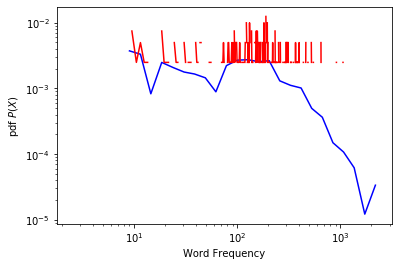

In [379]:
fig01 = powerlaw.plot_pdf(data, color='b')
powerlaw.plot_pdf(data, linear_bins=True, color='r', ax=fig01)

fig01.set_xlabel("Word Frequency")
fig01.set_ylabel(r"pdf $P(X)$")

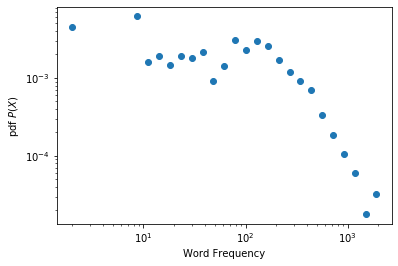

In [380]:
bin_edges = np.logspace(np.log10(min(data)), np.log10(max(data)), num=30)
density, _ = np.histogram(data, bins=bin_edges, density=True)
fig02 = plt.figure()
plt.loglog(bin_edges[:-1], density, marker='o', linestyle='none')

plt.xlabel("Word Frequency")
plt.ylabel(r"pdf $P(X)$")
plt.show()

Text(0.5, 0, 'Word Frequency x')

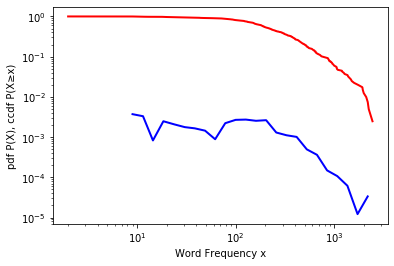

In [381]:
fig03 = powerlaw.plot_pdf(data, color='b', linewidth=2)
powerlaw.plot_ccdf(data, color='r', linewidth=2, ax=fig03)

fig03.set_ylabel(u"pdf P(X), ccdf P(X≥x)")
fig03.set_xlabel(r"Word Frequency x")

In [382]:
# https://stackoverflow.com/questions/1911281/how-do-i-get-list-of-methods-in-a-python-class
[method_name for method_name in dir(powerlaw.Fit) if callable(getattr(powerlaw.Fit, method_name)) and not method_name.startswith("__")]

['ccdf',
 'cdf',
 'distribution_compare',
 'find_xmin',
 'loglikelihood_ratio',
 'nested_distribution_compare',
 'pdf',
 'plot_ccdf',
 'plot_cdf',
 'plot_pdf']

In [384]:
fit = powerlaw.Fit(data, discrete=True)
print(vars(fit))

{'data_original': [398, 252, 112, 151, 113, 122, 278, 93, 226, 24, 459, 296, 155, 190, 134, 1994, 33, 329, 35, 19, 181, 310, 144, 238, 470, 127, 156, 454, 232, 161, 122, 324, 953, 206, 190, 96, 349, 251, 505, 366, 176, 152, 41, 74, 39, 649, 389, 627, 105, 130, 134, 81, 183, 18, 201, 1507, 43, 140, 128, 397, 261, 165, 98, 333, 213, 311, 535, 106, 195, 168, 239, 438, 648, 311, 727, 172, 105, 381, 648, 195, 1951, 221, 330, 880, 792, 940, 2241, 389, 412, 277, 512, 181, 862, 662, 147, 123, 228, 1066, 175, 73, 503, 80, 440, 975, 244, 433, 1061, 185, 2189, 522, 524, 180, 184, 291, 186, 189, 248, 219, 189, 141, 553, 915, 54, 13, 232, 309, 200, 161, 297, 254, 447, 198, 107, 87, 150, 376, 271, 137, 375, 871, 153, 21, 273, 220, 631, 735, 697, 28, 148, 90, 55, 1251, 2112, 1591, 378, 245, 721, 447, 462, 338, 165, 103, 47, 289, 24, 367, 1931, 39, 122, 173, 154, 84, 181, 309, 91, 887, 235, 363, 131, 20, 152, 445, 418, 53, 9, 58, 224, 157, 401, 157, 437, 11, 125, 236, 204, 1366, 123, 259, 127, 1476, 1

Calculating best minimal value for power law fit


Text(0.5, 0, 'Word Frequency')

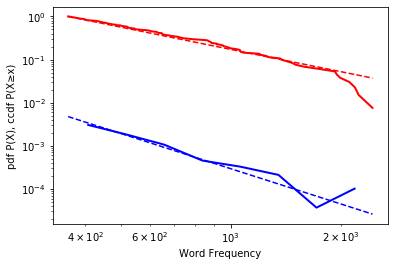

In [385]:
fig04 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig04)
fit.plot_ccdf(color='r', linewidth=2, ax=fig04)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig04)

fig04.set_ylabel(u"pdf P(X), ccdf P(X≥x)")
fig04.set_xlabel(r"Word Frequency")

In [386]:
print("alpha ± sigma: " + str(round(fit.alpha, 3)) +" ± "+str(round(fit.sigma, 3)))
print("xmin: " + str(round(fit.xmin)))

alpha ± sigma: 2.714 ± 0.149
xmin: 359.0


Fitting the tail considers 132 data points.
Fitting the whole data set considers 403 data points.


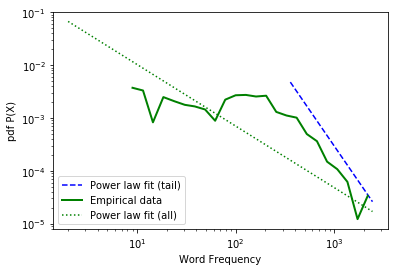

In [405]:
fig05 = fit.power_law.plot_pdf(color='b', linestyle='--', label='Power law fit (tail)') # blue dashed line: best fit for xmin = 7
print("Fitting the tail considers " +  str(round(fit.n_tail)) + " data points.")

fitxmin1 = powerlaw.Fit(data, xmin=1, discrete=True)
print("Fitting the whole data set considers " +  str(round(fitxmin1.n_tail)) + " data points.")
fitxmin1.plot_pdf(color='g', linewidth=2, ax=fig05, label='Empirical data') # green thick line: full data set
fitxmin1.power_law.plot_pdf(linestyle=':', color='g', ax=fig05, label='Power law fit (all)') # green dotted line: best fit for xmin = 1

handles, labels = fig05.get_legend_handles_labels()
fig05.set_ylabel(u"pdf P(X)")
fig05.set_xlabel(r"Word Frequency")
fig05.legend(handles, labels, loc=3)

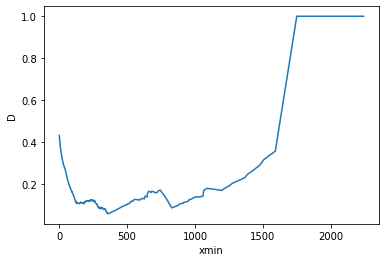

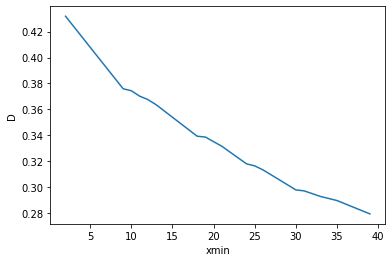

In [390]:
fig06 = plt.figure()
plt.plot(fit.xmins, fit.Ds)
plt.xlabel("xmin")
plt.ylabel("D")
plt.show()

fig07 = plt.figure()
plt.plot(fit.xmins[:20], fit.Ds[:20])
plt.xlabel("xmin")
plt.ylabel("D")
plt.show()

In [408]:
numsim = 50 # number of synthetic data sets

Ds_simulated = [None]*numsim # list of synthetic KS statistics
data_head = np.array([data[i] for i in range(len(data)) if data[i] < int(fit.xmin)])

for i in range(numsim):
    theoretical_distribution = powerlaw.Power_Law(xmin=fit.xmin, parameters=[fit.alpha])
    simulated_data = theoretical_distribution.generate_random(round(fit.n_tail)) # simulated tail data
    simulated_data = np.append(data_head, simulated_data) # put together simulated tail with real head
    if i == 0:
        print(simulated_data) # Show the first sythetic data set, to make sure we did it correctly
    fit_simulated = powerlaw.Fit(simulated_data, verbose=True)
    Ds_simulated[i] = fit_simulated.D

[2.52000000e+02 1.12000000e+02 1.51000000e+02 1.13000000e+02
 1.22000000e+02 2.78000000e+02 9.30000000e+01 2.26000000e+02
 2.40000000e+01 2.96000000e+02 1.55000000e+02 1.90000000e+02
 1.34000000e+02 3.30000000e+01 3.29000000e+02 3.50000000e+01
 1.90000000e+01 1.81000000e+02 3.10000000e+02 1.44000000e+02
 2.38000000e+02 1.27000000e+02 1.56000000e+02 2.32000000e+02
 1.61000000e+02 1.22000000e+02 3.24000000e+02 2.06000000e+02
 1.90000000e+02 9.60000000e+01 3.49000000e+02 2.51000000e+02
 1.76000000e+02 1.52000000e+02 4.10000000e+01 7.40000000e+01
 3.90000000e+01 1.05000000e+02 1.30000000e+02 1.34000000e+02
 8.10000000e+01 1.83000000e+02 1.80000000e+01 2.01000000e+02
 4.30000000e+01 1.40000000e+02 1.28000000e+02 2.61000000e+02
 1.65000000e+02 9.80000000e+01 3.33000000e+02 2.13000000e+02
 3.11000000e+02 1.06000000e+02 1.95000000e+02 1.68000000e+02
 2.39000000e+02 3.11000000e+02 1.72000000e+02 1.05000000e+02
 1.95000000e+02 2.21000000e+02 3.30000000e+02 2.77000000e+02
 1.81000000e+02 1.470000

Calculating best minimal value for power law fit
/home/antonio/Desktop/Dottorato/socioPatterns/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Cal

In [409]:
Ds_simulated = np.array(Ds_simulated)
pval = len(Ds_simulated[Ds_simulated > fit.D]) / len(Ds_simulated)
print("The p-value " + str(pval) + " is >0.1, therefore we cannot reject the power law hypothesis.")

The p-value 0.16 is >0.1, therefore we cannot reject the power law hypothesis.


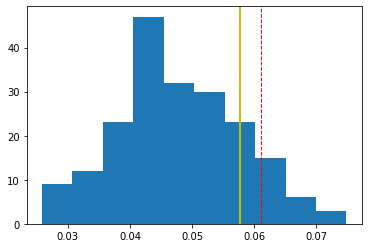

In [401]:
plt.hist(Ds_simulated)
plt.axvline(x=fit.D, color='y', linewidth=2)
plt.axvline(x=np.percentile(Ds_simulated, 90), color='r', linewidth=1, linestyle='--') 
plt.show()

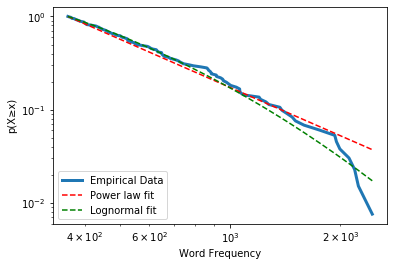

In [402]:
fit.distribution_compare('power_law', 'lognormal')
fig08 = fit.plot_ccdf(linewidth=3, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig08, color='r', linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig08, color='g', linestyle='--', label='Lognormal fit')

fig08.set_ylabel(u"p(X≥x)")
fig08.set_xlabel("Word Frequency")
handles, labels = fig08.get_legend_handles_labels()
fig08.legend(handles, labels, loc=3)

In [403]:
print("mu: " + str(round(fit.lognormal.mu, 3)))
print("sigma: " + str(round(fit.lognormal.sigma, 3)))

mu: 5.159
sigma: 0.998


In [404]:
R,p = fit.distribution_compare('power_law', 'lognormal')
print("R: " + str(round(R, 4)))
print("p-value: " + str(round(p, 2)))

R: -2.7684
p-value: 0.11
